# Case 13 - Logistic Regression

## Business Problem

Currently the company you are working for is having a talent retention problem. You have found useful to understand this behavior and find the reasons why people leave the company. And, not only that, you want to able to predict it.

## Packages Import

In [ ]:
!pip install statsmodels==0.12.2

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.tools import add_constant as add_constant

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing

import statsmodels.formula.api as sfm
from sklearn.metrics import roc_curve, auc

from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, RobustScaler, StandardScaler, OrdinalEncoder

## Data Import

The information was downloaded from a dataset available at [Kaggle](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset). These data are tabular, and are in .csv format. Therefore they can be loaded as a table in python. This can be done via a pandas DataFrame.

In [ ]:
df_HR = pd.read_csv('/work/indu5012_case_13/data/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df_HR.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## EDA

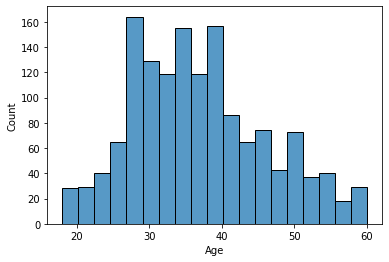

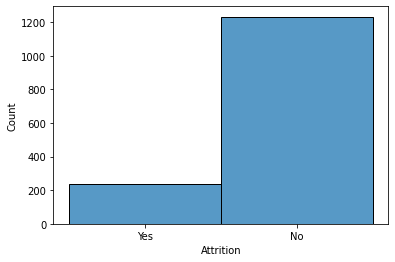

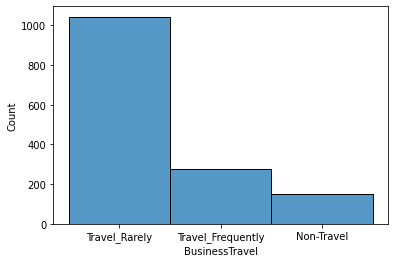

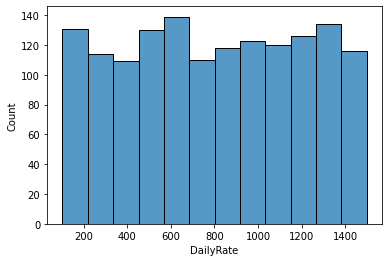

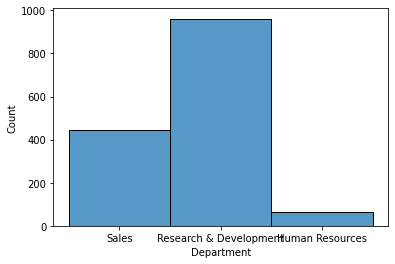

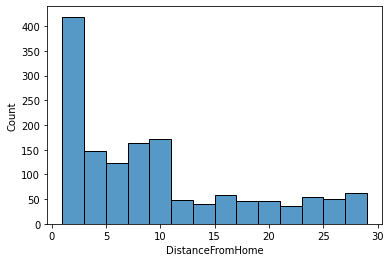

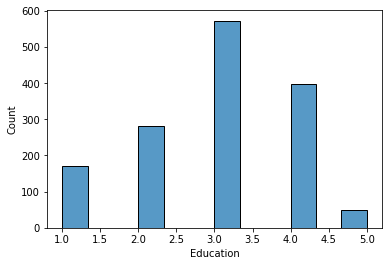

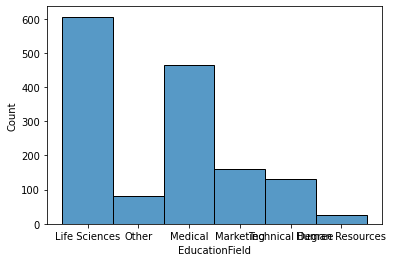

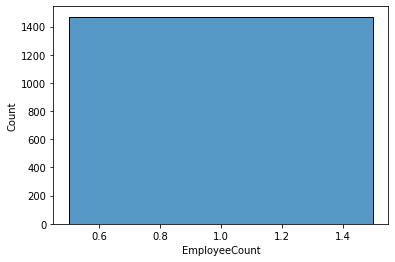

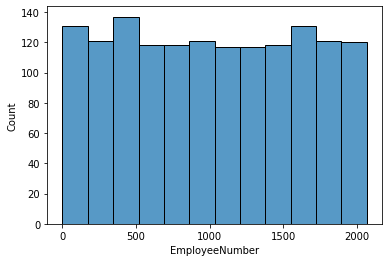

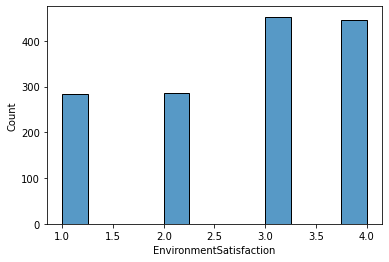

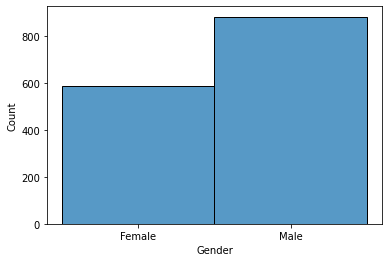

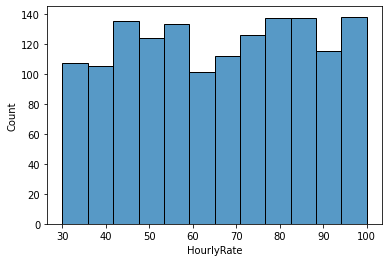

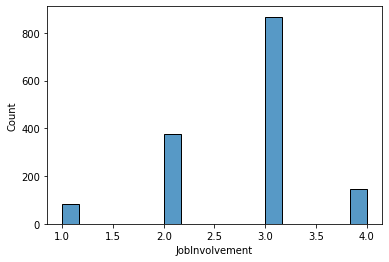

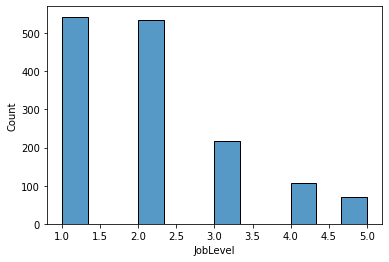

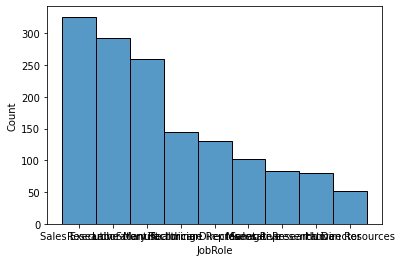

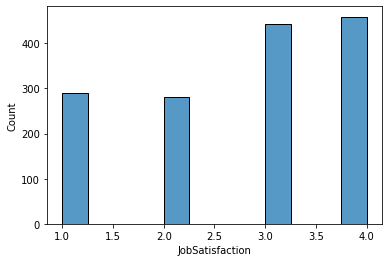

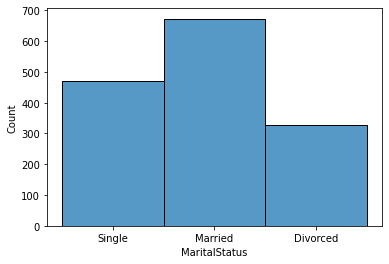

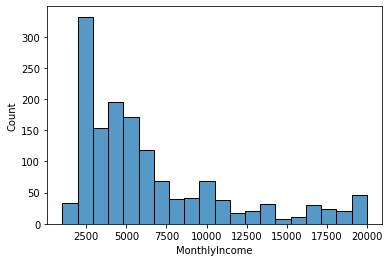

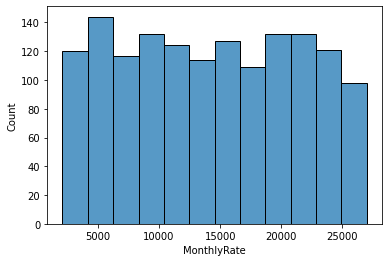

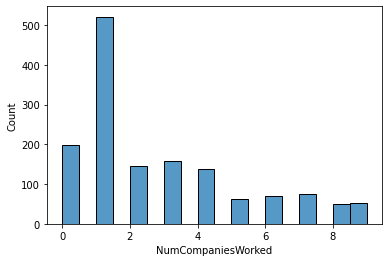

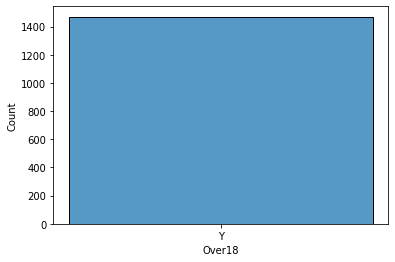

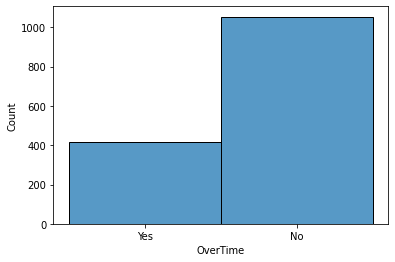

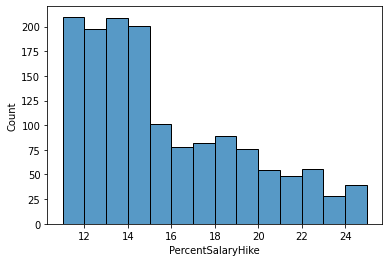

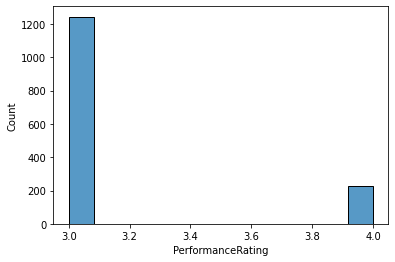

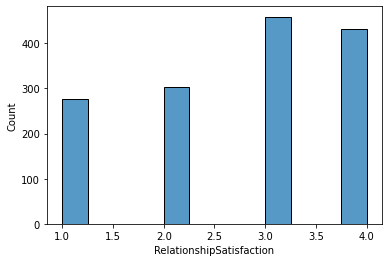

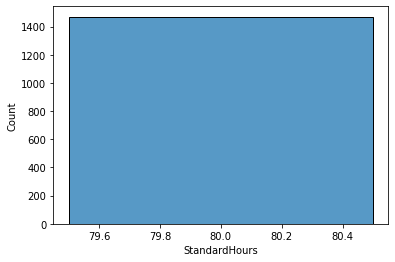

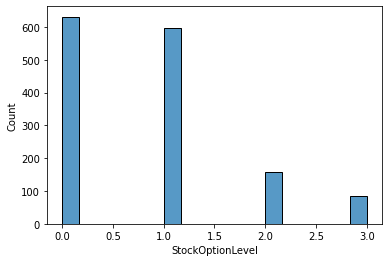

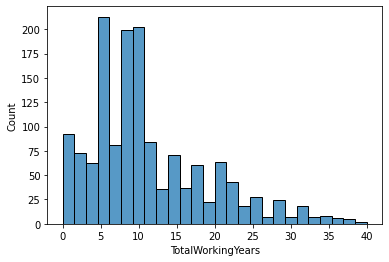

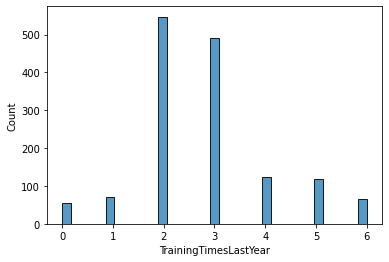

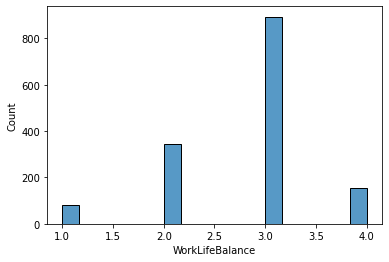

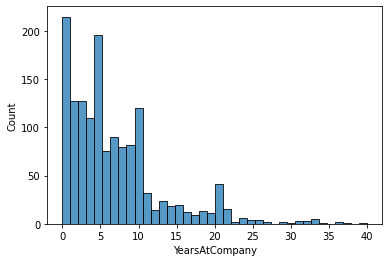

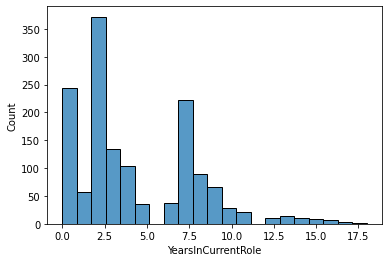

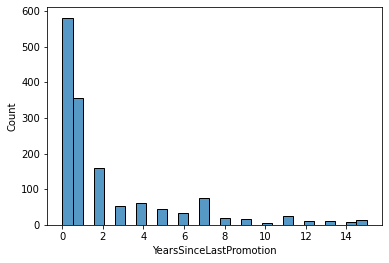

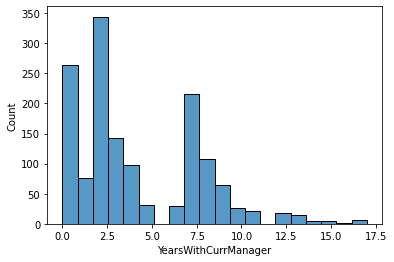

In [ ]:
for column in df_HR.columns:
    sns.histplot(x= column,data = df_HR)
    plt.show()

## Machine Learning

### Supervised Learning

Supervised learning is typically done in the context of classification, when we want to map input to output labels, or regression, when we want to map input to a continuous output. 

<figure>
<img src="/work/indu5012_case_13/fig/Supervised_Learning.png" align="center"/> 
</figure> 

The goal is to find specific relationships or structure in the input data that allow us to effectively produce correct output data.

<figure>
<img src="/work/indu5012_case_13/fig/supervised-machine-learning.png" align="center"/> 
</figure> 


https://towardsdatascience.com/supervised-vs-unsupervised-learning-14f68e32ea8d


## Logistic regression

Consider a problem where a person has to be classified as if it will enter default (being unable to repay a debt) or not, based on the balance of the debt. In this problem, the response variable $Y$ can be encoded in the following way:<center> $
Y = \left\{
    \begin{matrix}
        0, \ \text {if \ not \ default} \\
        1, \ \text {if \ default} \\
    \end{matrix}
\right.
$ </center>

Now, the regression models will not model $Y$, but they will rather model the probability of a particular observation belonging to a particular category. Therefore, for this problem the value fit by the models will be $\hat Y =\hat{Pr}\text{(Default=yes|balance)} = p(\text{balance})$. This predicted value then has to be a value between 0 and 1. Then, the observations that have an estimated probability higher than a set cutoff point will be classified as people that will enter default. For example, if the cutoff point is 0.5, all of the observations that have their estimated probability higher than 0.5 ($p(\text{balance})>0.5$) will be classified as people that will enter default.

Now, how will these probabilities be estimated using a set of predictors $X$? If the linear regression method was used to estimate these probabilities, then the resulting model would be as following: <center>$p(\text{balance})= \beta_0+X\beta$</center>

However, if this model was used, then the results can resemble those shown in the left panel of the following figure:

<figure>
<img src="/work/indu5012_case_13/fig/LinReg_vs_LogReg.PNG" align="center"/> 

<figcaption align = "center"><b>Fig. 6.1 - Linear regression and logistic regression results for p(balance)</b>.<i>Taken from (James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013))</i></figcaption>
</figure> 

As it can be seen, the linear regression model will produce estimates outside the $[0,1]$ range when the values of `balance`are too low or too high, which difficults their intepretation as probabilites. In order to avoid this problem, the linear regression expression is rescaled through a function to produce only values between 0 and 1. There are multiple functions that can accomplish that rescaling; in logistic regression, the function used is the **logistic function** or the **sigmoid function**, which is a rescaled version of the hyperbolic tangent function: <center>$\sigma(\beta_0+X\beta)=\frac{e^{\beta_0+X\beta}}{1+e^{\beta_0+X\beta}}=\frac{1}{1+e^{-\beta_0+X\beta}}$ </center>

As ordinary least squares cannot be used, to obtain the logistic regression estimates the maximum likelihood method is used. The estimates produced for the default data by the logistic regression model are shown in the right-hand panel of figure 6.1. With the sigmoid transformation, low balances now generate a prediction of the probability of default as close to, but never below, zero. Likewise, high balances now generate a prediction of the probability of default as close to, but never above, one. The logistic function will always produce an S-shaped curve of this form, and so regardless of the value of X, we will obtain a sensible prediction. It can also be seen that the logistic model is better able to capture the range of probabilities than the linear regression model in the left-hand plot. The average fitted probability in both cases is 0.0333 (averaged over the training data), which is the same as the overall proportion of defaulters in the data set.

## Interpretation of logistic regression results

With a little bit of manipulation of the expression for a logistic regression model, it is possible to find that: <center> $\frac{p(X)}{1-p(X)}= e^{\beta_0 + X\beta}$ </center>

The previous expression is called **odds**, which can take a value between 0 and $\infty$. Values very close to 0 and very close to $\infty$ represent very low and very high probabilitites of default, respectively, on the default problem. By taking the logarithm on both sides of the previous expression, we can see that: <center> $log(\frac{p(X)}{1-p(X)})= \beta_0 + X\beta$ </center>

This resulting expression is called the **log-odds** or **logit**. Therefore, we can see that a logistic regression have log-odds that are linear in $X$. If you remember, in the linear regression model the $\beta$ parameters represent the average change in $Y$ per unit in change of the predictors $X$. Similarly, in logistic regression, the $\beta$ parameters represent the averge change in the log-odds when there is a one-unit increment on the predictors $X$. So, for example, if there is an increment of one unit in $x_1$, then the log-odds will increment in $\beta_1$ units, which is the same as multiplying the odds by $e^{\beta_1}$. However, as the relationship between $X$ and the probability $p(X)$ is not linear, then $\beta_1$ does not correspond as to the change in $p(X)$ associated with a one-unit increase in $X$. The amount that $p(X)$ changes due to a one-unit change in $X$ will depend on the current value of $X$. But regardless of the value of $X$, if $\beta_1$ is positive then increasing $x_1$ will be associated with an increase in $p(X)$, and if $\beta_1$ is negative then increasing $x_1$ will be associated with a decrease on
$p(X)$. 

## Maximum likelihood estimation for logistic regression

In order to estimate the $\beta$ parameters, a training set has to be used. In order to estimate the parameters based on training observations, non-linear least squares or the maximum likelihood methods can be used (ordinary least squares cannot be used for logistic regression parameters). In this case the **maximum likelihood** method is preferred as it has better statistical properties. The notion used in the maximum likelihood estimation method for the logistic regression is that the estimated parameters $\hat\beta$ must be ones that make that the probabilities as close to one for people that defaluted and as close to zero for people that did not default. This notion can be formalized by maximizing the following likelihood function: <center> $\ell(\beta)=\prod_{i|y_i=1}(p(X_i))\prod_{i|y_i=0}(1-p(X_i))$ </center>

Maximum likelihood estimation is a very comon method to estimate parameters for non-linear models. The results that come from maximum likelihood estimation are very similar to the ones that come from ordinary least squares. The main difference bewteen both estimation methods is that to check the significance of parameters that come from maximum likelihood estimation a z-statistic is used instead of a t-statistic. <center> $z_\beta= \frac{\hat\beta}{sd(\hat\beta)} $ </center>


## Data Cleaning and Transformation

In [ ]:
df_HR.drop(columns = ['EmployeeCount','Over18','StandardHours'],inplace= True)
df_HR.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2


It can be seen that the data is unbalanced so, some data needs to be removed randomly in order to get a more balanced set of data.

<AxesSubplot:xlabel='Attrition', ylabel='Count'>

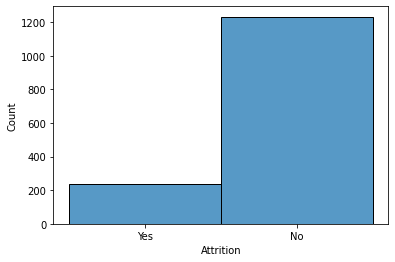

In [ ]:
sns.histplot(x= 'Attrition',data = df_HR)

In [ ]:
df_HR_Attrition_No = df_HR[df_HR['Attrition']=='No'].sample(n=300,random_state=2)
df_HR_Attrition_Yes = df_HR[df_HR['Attrition']=='Yes']
df_HR_sample = pd.concat([df_HR_Attrition_No,df_HR_Attrition_Yes],axis=0)
df_HR_sample = df_HR_sample.sample(frac = 1)
df_HR_sample.reset_index( drop=True, inplace=True)
df_HR_sample.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,19,Yes,Travel_Rarely,303,Research & Development,2,3,Life Sciences,243,2,...,4,3,0,1,3,2,1,0,1,0
1,35,Yes,Travel_Rarely,104,Research & Development,2,3,Life Sciences,1569,1,...,3,4,1,1,2,3,1,0,0,0
2,29,Yes,Travel_Rarely,350,Human Resources,13,3,Human Resources,1844,1,...,3,4,3,4,3,3,2,2,2,0
3,42,No,Travel_Rarely,419,Sales,12,4,Marketing,1943,2,...,3,3,2,14,4,3,0,0,0,0
4,21,Yes,Travel_Rarely,156,Sales,12,3,Life Sciences,494,3,...,3,4,0,1,0,3,1,0,0,0


<AxesSubplot:xlabel='Attrition', ylabel='Count'>

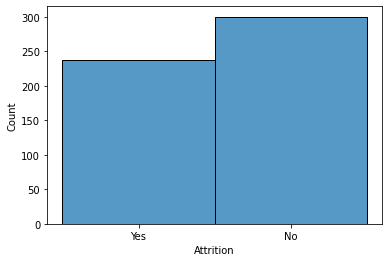

In [ ]:
sns.histplot(x= 'Attrition',data = df_HR_sample)

Some categorical data needs to be transformed into numerical information

In [ ]:
df_HR_sample_LR = df_HR_sample.copy()

df_HR_sample_LR['Attrition'].replace(['No','Yes',],[0, 1], inplace=True)
df_HR_sample_LR['Education'].replace(['No','Yes',],[0, 1], inplace=True)
df_HR_sample_LR['BusinessTravel'].replace([ 'Non-Travel','Travel_Rarely', 'Travel_Frequently'],[0, 1,2], inplace=True)
df_HR_sample_LR['Gender'].replace(['Female', 'Male'],[0, 1], inplace=True)
df_HR_sample_LR['OverTime'].replace(['Yes', 'No'],[1, 0], inplace=True)
df_HR_sample_LR.drop(columns = ['Department','EducationField','JobRole','MaritalStatus'],inplace=True)
df_HR_sample_LR.head(5)

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,19,1,1,303,2,3,243,2,1,47,...,4,3,0,1,3,2,1,0,1,0
1,35,1,1,104,2,3,1569,1,0,69,...,3,4,1,1,2,3,1,0,0,0
2,29,1,1,350,13,3,1844,1,1,56,...,3,4,3,4,3,3,2,2,2,0
3,42,0,1,419,12,4,1943,2,1,77,...,3,3,2,14,4,3,0,0,0,0
4,21,1,1,156,12,3,494,3,0,90,...,3,4,0,1,0,3,1,0,0,0


## Basic Comparison Analysis

<AxesSubplot:xlabel='Attrition', ylabel='YearsAtCompany'>

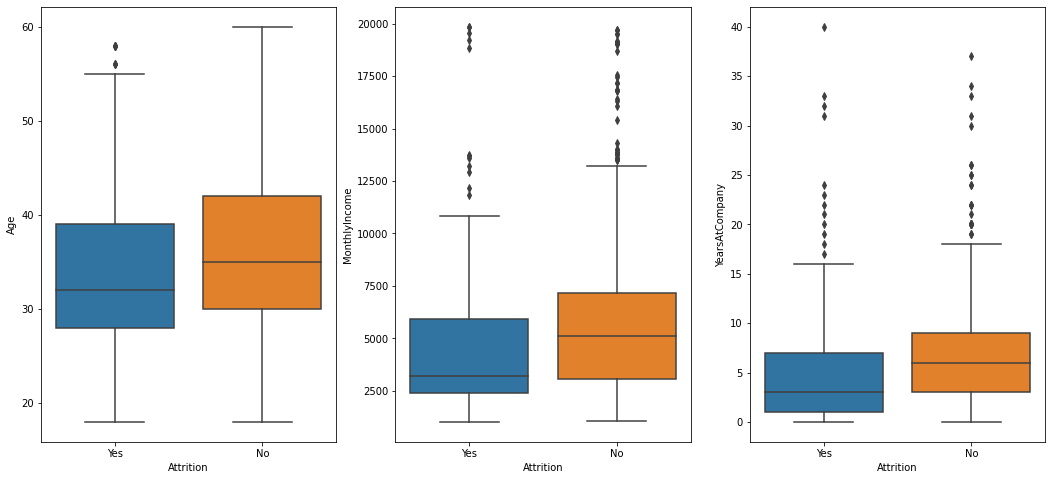

In [ ]:
fig, ax=plt.subplots(1,3, figsize=(18,8))
sns.boxplot(y='Age', x='Attrition', data=df_HR_sample, ax=ax[0])
sns.boxplot(y='MonthlyIncome', x ='Attrition', data = df_HR_sample, ax=ax[1])
sns.boxplot(y='YearsAtCompany', x='Attrition', data=df_HR_sample, ax=ax[2])

## Train - Test Split

20% of the data is kept aside in order to assess the performace of the model on data that the model has not been trained on.

In [ ]:
np.random.seed(135568109) # a seed makes the analysis reproducible
                     # so everyone will get the same results
ndata = len(df_HR_sample_LR)
# Randomly choose 0.8n indices between 1 and n
idx_train = np.random.choice(range(ndata),int(0.8*ndata),replace=False)
# The test set is comprised from all the indices that were
# not selected in the training set:
idx_test  = np.asarray(list(set(range(ndata)) - set(idx_train)))
train     = df_HR_sample_LR.iloc[idx_train] # the training data set
test      = df_HR_sample_LR.iloc[idx_test]  # the test data set
print(train.shape) # 
print(test.shape)  #  

(429, 28)
(108, 28)


## Exercise 1

Determine if a model with just the variables `age` and `Education` is significant on determining if a person is going to leave the company.What can you conclude about it?

In [ ]:
#Definition of input variables
X_1 = train[['Age','Education']]
#Definition of output variable
y_1 = train['Attrition']

#Building the model and fitting the data
log_reg_1 = sm.Logit(y_1, X_1).fit()

#Printing the summary table
print(log_reg_1.summary())


Optimization terminated successfully.
         Current function value: 0.674154
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                  429
Model:                          Logit   Df Residuals:                      427
Method:                           MLE   Df Model:                            1
Date:                Sat, 12 Mar 2022   Pseudo R-squ.:                 0.01296
Time:                        17:35:12   Log-Likelihood:                -289.21
converged:                       True   LL-Null:                       -293.01
Covariance Type:            nonrobust   LLR p-value:                  0.005859
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Age           -0.0200      0.008     -2.644      0.008      -0.035      -0.005
Education      0.1243      0.

## Exercise 2

What variables would you consider that should be important on building a model for determining if a person is going to leave the company. Run a model to check your hypothesis. What can you conclude about it?

**Answer**

In [ ]:
#Definition of input variables
X_2 = train[['YearsAtCompany']]
#Definition of output variable
y_2 = train['Attrition']

#Building the model and fitting the data
log_reg_2 = sm.Logit(y_2, X_2).fit()

#Printing the summary table
print(log_reg_2.summary())

Optimization terminated successfully.
         Current function value: 0.665484
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                  429
Model:                          Logit   Df Residuals:                      428
Method:                           MLE   Df Model:                            0
Date:                Sat, 12 Mar 2022   Pseudo R-squ.:                 0.02565
Time:                        17:35:12   Log-Likelihood:                -285.49
converged:                       True   LL-Null:                       -293.01
Covariance Type:            nonrobust   LLR p-value:                       nan
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
YearsAtCompany    -0.0556      0.012     -4.521      0.000      -0.080      -0.031


## Exercise 3

Run a model containig all the variables in the dataset. What variables are still relevant on determining if a person is going to leave the company. What can you conclude about it?

In [ ]:
#Definition of input variables
X_3 = train.drop(columns='Attrition')
#Definition of output variable
y_3 = train['Attrition']

#Building the model and fitting the data
log_reg_3 = sm.Logit(y_3, X_3).fit()

#Printing the summary table
print(log_reg_3.summary())

Optimization terminated successfully.
         Current function value: 0.477407
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                  429
Model:                          Logit   Df Residuals:                      402
Method:                           MLE   Df Model:                           26
Date:                Sat, 12 Mar 2022   Pseudo R-squ.:                  0.3010
Time:                        17:35:12   Log-Likelihood:                -204.81
converged:                       True   LL-Null:                       -293.01
Covariance Type:            nonrobust   LLR p-value:                 2.647e-24
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Age                         -0.0047      0.019     -0.243      0.808      -0.042

## Exercise 4

Run a model containig only variables that are significant for the model. What can you conclude about it?

In [ ]:
df_HR_sample_LR.drop(columns = ['Age','DailyRate','Education','EmployeeNumber','Gender','HourlyRate','JobLevel','MonthlyRate','NumCompaniesWorked','NumCompaniesWorked','OverTime','RelationshipSatisfaction','WorkLifeBalance','MonthlyIncome','DistanceFromHome','PercentSalaryHike','TrainingTimesLastYear','YearsAtCompany','EnvironmentSatisfaction','TotalWorkingYears'],inplace=True)

np.random.seed(135568109) # a seed makes the analysis reproducible
                     # so everyone will get the same results
ndata = len(df_HR_sample_LR)
# Randomly choose 0.8n indices between 1 and n
idx_train = np.random.choice(range(ndata),int(0.8*ndata),replace=False)
# The test set is comprised from all the indices that were
# not selected in the training set:
idx_test  = np.asarray(list(set(range(ndata)) - set(idx_train)))
train     = df_HR_sample_LR.iloc[idx_train] # the training data set
test      = df_HR_sample_LR.iloc[idx_test]  # the test data set
print(train.shape) #
print(test.shape)  #  

(429, 9)
(108, 9)


In [ ]:
#Definition of input variables
X_4 = train.drop(columns='Attrition')
#Definition of output variable
y_4 = train['Attrition']

#Building the model and fitting the data
log_reg_4 = sm.Logit(y_4, X_4).fit()

#Printing the summary table
print(log_reg_4.summary())

Optimization terminated successfully.
         Current function value: 0.592211
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                  429
Model:                          Logit   Df Residuals:                      421
Method:                           MLE   Df Model:                            7
Date:                Sat, 12 Mar 2022   Pseudo R-squ.:                  0.1329
Time:                        17:35:13   Log-Likelihood:                -254.06
converged:                       True   LL-Null:                       -293.01
Covariance Type:            nonrobust   LLR p-value:                 3.689e-14
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
BusinessTravel              0.7360      0.208      3.546      0.000       0.329   

## Evaluating the logistic regression mode

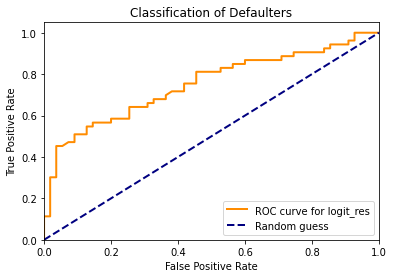

In [ ]:
predict_p = log_reg_4.predict(test[['BusinessTravel','JobInvolvement','JobSatisfaction','PerformanceRating','StockOptionLevel','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']])
#predict_2_p = logit_res2.predict(df6[['Intercept','loan_amnt','int_rate']])
roc_p = roc_curve(test['Attrition'], predict_p)
#roc_2_p = roc_curve(df6['loan_status'], predict_2_p)

plt.figure()
line_width = 2
plt.plot(roc_p[0], roc_p[1], color='darkorange',
         lw=line_width, label=f'ROC curve for logit_res')
#plt.plot(roc_2_p[0], roc_2_p[1], color='darkgreen',
         #lw=line_width, label=f'ROC curve for model in Ex 6')
plt.plot([0, 1], [0, 1], color='navy', lw=line_width, linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Classification of Defaulters')
plt.legend(loc='lower right')
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=96262903-a28f-4719-a328-dc59e3cfa77f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>